# 1. Perkenalan

- Nama : Steven Kusuma

- Batch : 015

- Dataset : Sinarmas Land Indonesia Credit Risk Dataset (https://drive.google.com/drive/folders/1wAeRTMQDfipUdFsKt-aaO_vNhDIA--Il)

- Objective : Clustering and Credit Risk Modeling

# 2. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Preprocess

from sklearn.preprocessing import StandardScaler

# Machine Learning

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# 3. Data Loading

In [2]:
# Load Dataset

data = pd.read_excel('IndonesiaCreditData.xlsx')
data

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [3]:
data.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car


In [4]:
data.tail()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV
999,999,27,male,2,own,moderate,moderate,56737824,45,car


In [5]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Data terdiri dari 10 column :

- `5 Integer`
- `5 String`

In [6]:
# Check Dataset - 2

data.describe()

,No,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,35.546000,1.904000,4.056033e+07,20.903000
std,288.819436,11.375469,0.653614,3.499911e+07,12.058814
min,0.000000,19.000000,0.000000,3.099750e+06,4.000000
25%,249.750000,27.000000,2.000000,1.693083e+07,12.000000
50%,499.500000,33.000000,2.000000,2.875948e+07,18.000000
75%,749.250000,42.000000,2.000000,4.925193e+07,24.000000
max,999.000000,75.000000,3.000000,2.284392e+08,72.000000


`Mean` and `50%` is nearly the same, data is normally distributed. No handling outliers needed.

In [7]:
# Check Missing Values

data.isnull().sum()

No                    0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

There are `183 Missing Values` in `Saving Accounts` and `394 Missing Values` in `Checking Account`. Will be handled in `Data Preprocessing`.

In [8]:
data.drop(['No'], axis=1, inplace=True)

Drop column `No` because it will not be used.

In [9]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,49,male,1,own,little,NaN,25988304,12,education
3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,40,male,3,own,little,little,47822943,30,car
997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,23,male,2,free,little,little,22876155,45,radio/TV


# 4. Exploratory Data Analysis

<AxesSubplot: ylabel='Sex'>

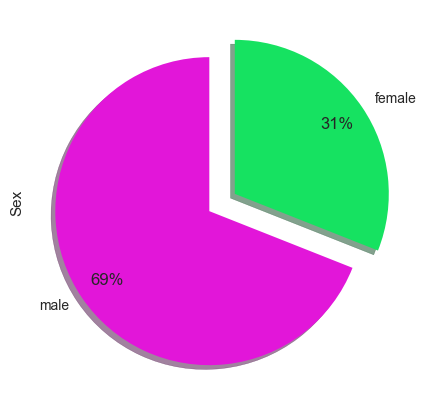

In [10]:
# Create Pie Chart to know gender distribution in data

data['Sex'].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                  shadow=True,
                                  startangle=90,
                                  pctdistance=0.8,
                                  explode= (0.1,0.1),
                                  colors=['#e216d9', '#16e261'],
                                  figsize=(5,5))

`69%` of the data is `Male`, and the rest `31%` is `Female`.

<function matplotlib.pyplot.show(close=None, block=None)>

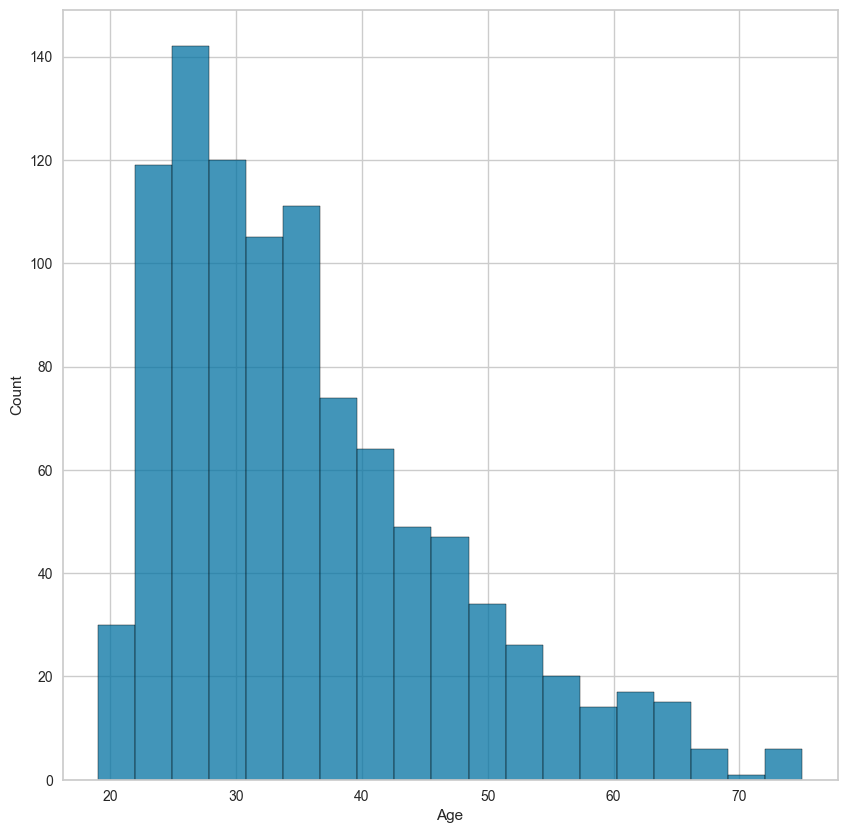

In [11]:
plt.figure(figsize=(10,10))
sns.histplot(data["Age"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

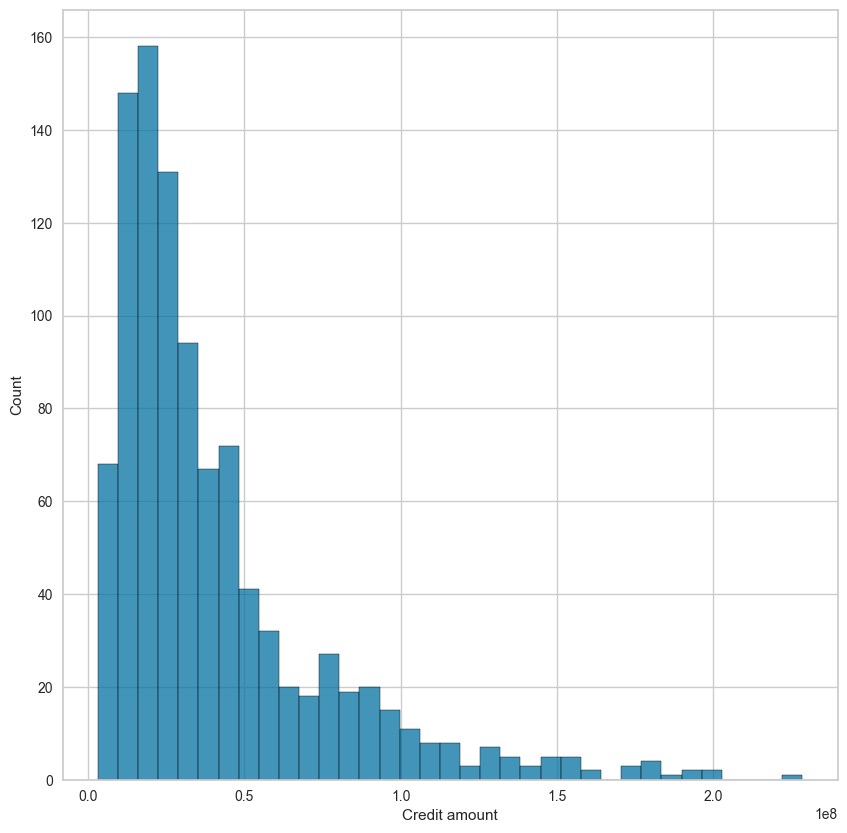

In [12]:
plt.figure(figsize=(10,10))
sns.histplot(data["Credit amount"])
plt.show

<AxesSubplot: >

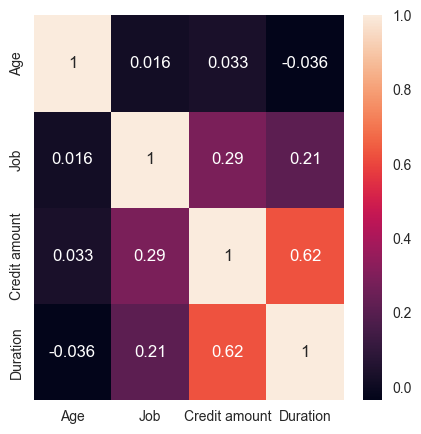

In [13]:
# Data Heatmap

plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True)

`Credit Amount` and `Duration` has a positive correlation between each other. Whereas the rest is not correlated.

In [14]:
# Renaming number in job to each named groups

job = {0: 'unskilled and non-resident', 1: 'unskilled and resident', 2: 'skilled', 3: 'highly skilled'}
data['Job'] = data['Job'].map(job)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,14494431,6,radio/TV
1,22,female,skilled,own,little,moderate,73786449,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,25988304,12,education
3,45,male,skilled,free,little,little,97728918,42,furniture/equipment
4,53,male,skilled,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled and resident,own,little,NaN,21524664,12,furniture/equipment
996,40,male,highly skilled,own,little,little,47822943,30,car
997,38,male,skilled,own,little,NaN,9968796,12,radio/TV
998,23,male,skilled,free,little,little,22876155,45,radio/TV


Renaming number in job to each named groups, to make the visual easier rather than having numbers.

# 5. Data Preprocessing

## 5.1. Get Data for Model Inference

In [15]:
# Get Data for model Inference

data_inf = data.sample(10, random_state=25)
data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
688,35,male,skilled,own,moderate,NaN,34134447,9,radio/TV
49,28,female,skilled,own,moderate,NaN,25703127,12,radio/TV
288,49,female,skilled,own,little,moderate,13539708,12,radio/TV
698,24,male,skilled,own,little,NaN,22318200,18,radio/TV
775,25,female,skilled,rent,NaN,little,16999029,24,car
305,33,male,skilled,own,rich,NaN,19131657,6,furniture/equipment
279,29,male,highly skilled,rent,moderate,NaN,23570499,24,radio/TV
599,32,male,skilled,free,little,NaN,47897337,24,business
988,29,male,highly skilled,free,little,little,81573021,24,car
627,29,male,skilled,own,moderate,moderate,17817363,9,car


In [16]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,14494431,6,radio/TV
1,22,female,skilled,own,little,moderate,73786449,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,25988304,12,education
3,45,male,skilled,free,little,little,97728918,42,furniture/equipment
4,53,male,skilled,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled and resident,own,little,NaN,21524664,12,furniture/equipment
996,40,male,highly skilled,own,little,little,47822943,30,car
997,38,male,skilled,own,little,NaN,9968796,12,radio/TV
998,23,male,skilled,free,little,little,22876155,45,radio/TV


In [17]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35,male,skilled,own,moderate,NaN,34134447,9,radio/TV
1,28,female,skilled,own,moderate,NaN,25703127,12,radio/TV
2,49,female,skilled,own,little,moderate,13539708,12,radio/TV
3,24,male,skilled,own,little,NaN,22318200,18,radio/TV
4,25,female,skilled,rent,NaN,little,16999029,24,car
5,33,male,skilled,own,rich,NaN,19131657,6,furniture/equipment
6,29,male,highly skilled,rent,moderate,NaN,23570499,24,radio/TV
7,32,male,skilled,free,little,NaN,47897337,24,business
8,29,male,highly skilled,free,little,little,81573021,24,car
9,29,male,skilled,own,moderate,moderate,17817363,9,car


## 5.2. Splitting between `X` (Features) and `y` (Target)

No splitting of `features and target` and `train and test set` needed because there is no `target`, and only doing `clustering model`.

## 5.3. Handling Outliers

As explained in the `Data Loading` part there is no `handling outliers` needed.

## 5.4. Handling Missing Values

In [18]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [19]:
# Just fill Saving Accounts missing values with `None`

data["Saving accounts"] = data["Saving accounts"].fillna("none")

In [20]:
# Just fill Checking Account missing values with `None`

data["Checking account"] = data["Checking account"].fillna("none")

In [21]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

All `Missing Values` has been handled.

## 5.5. Feature Scaling

In [22]:
# Using Age, Credit amount, and Duration column to cluster

number_columns = ["Age", "Credit amount", "Duration"]
number_data = data_train_test.loc[:,number_columns]

In [23]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(number_data)

number_data_scaled = scaler.transform(number_data)

number_data_scaled

array([[ 2.75558254, -0.74584553, -1.23724167],
       [-1.1921038 ,  0.94398752,  2.23850379],
       [ 1.176508  , -0.41826811, -0.7407066 ],
       ...,
       [ 0.21151801, -0.87482693, -0.7407066 ],
       [-1.10437744, -0.50696491,  1.99023625],
       [-0.75347199,  0.45809868,  1.99023625]])

# 6. Model Definition

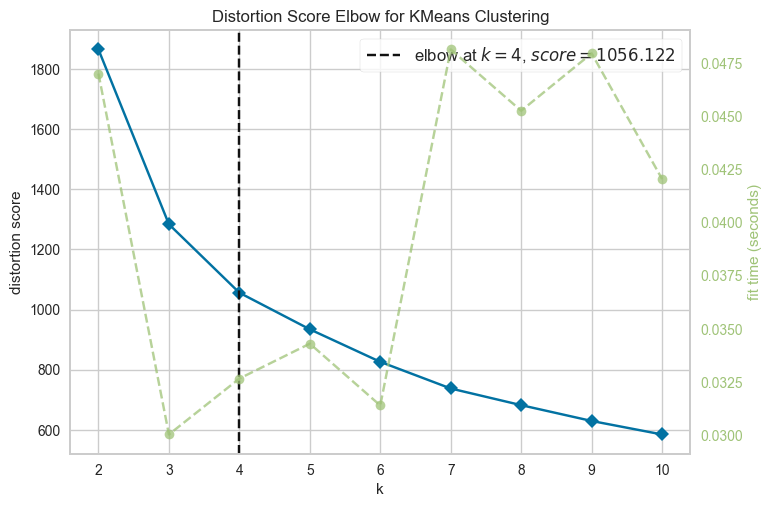

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Finding optimal K cluster

elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(number_data_scaled)
elbow_graph.show()

Best cluster is at `4 Clusters`

For n_clusters = 2 The average silhouette_score is : 0.43448323293757024
For n_clusters = 3 The average silhouette_score is : 0.3885096054051628
For n_clusters = 4 The average silhouette_score is : 0.3210320068217799


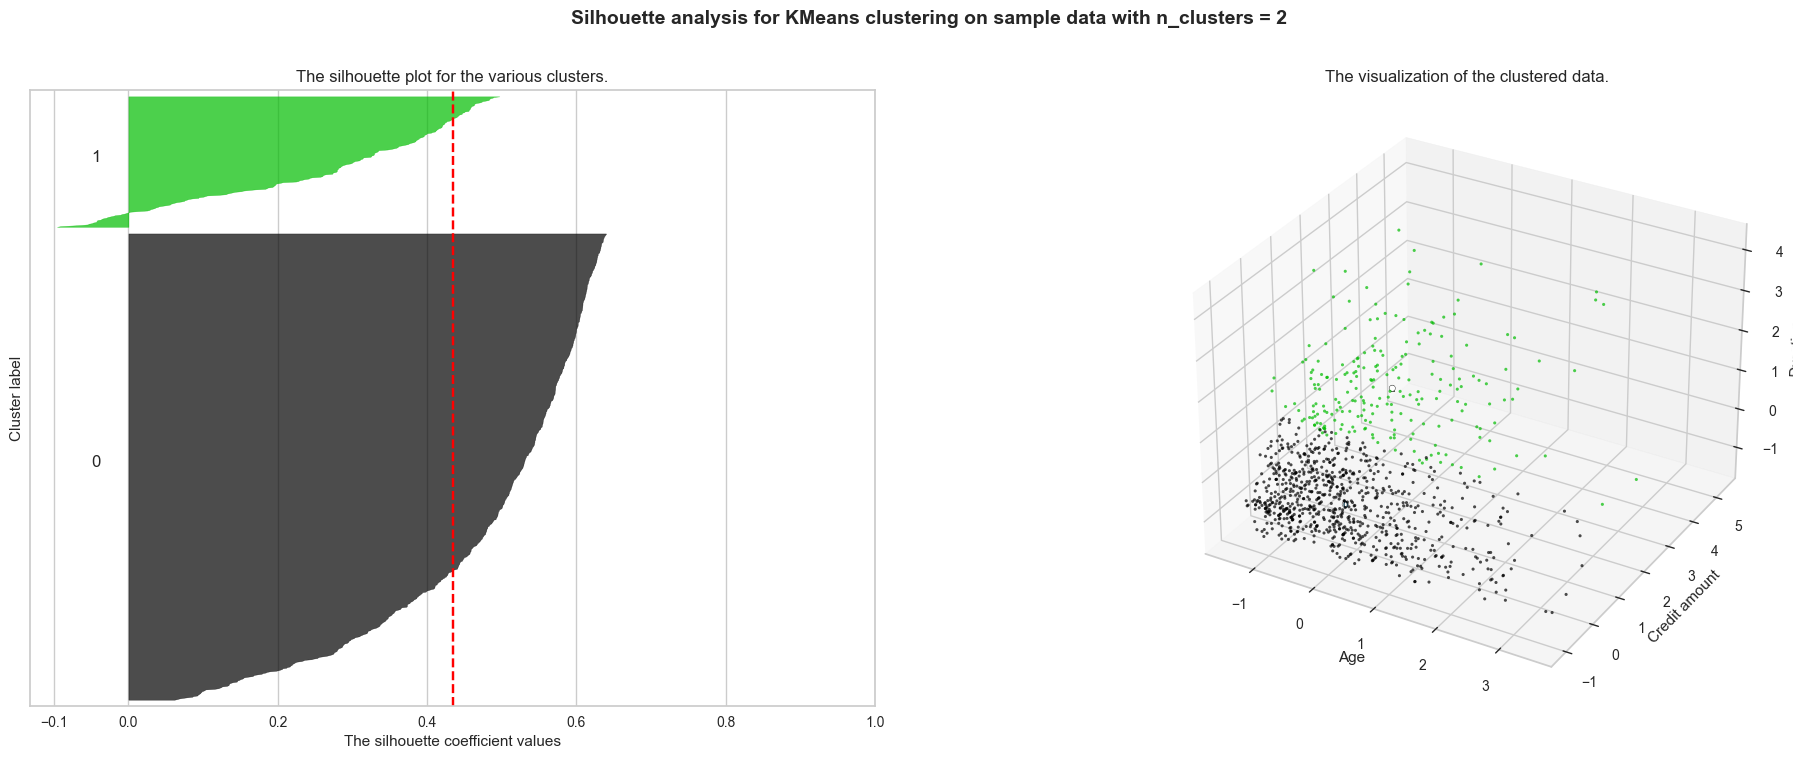

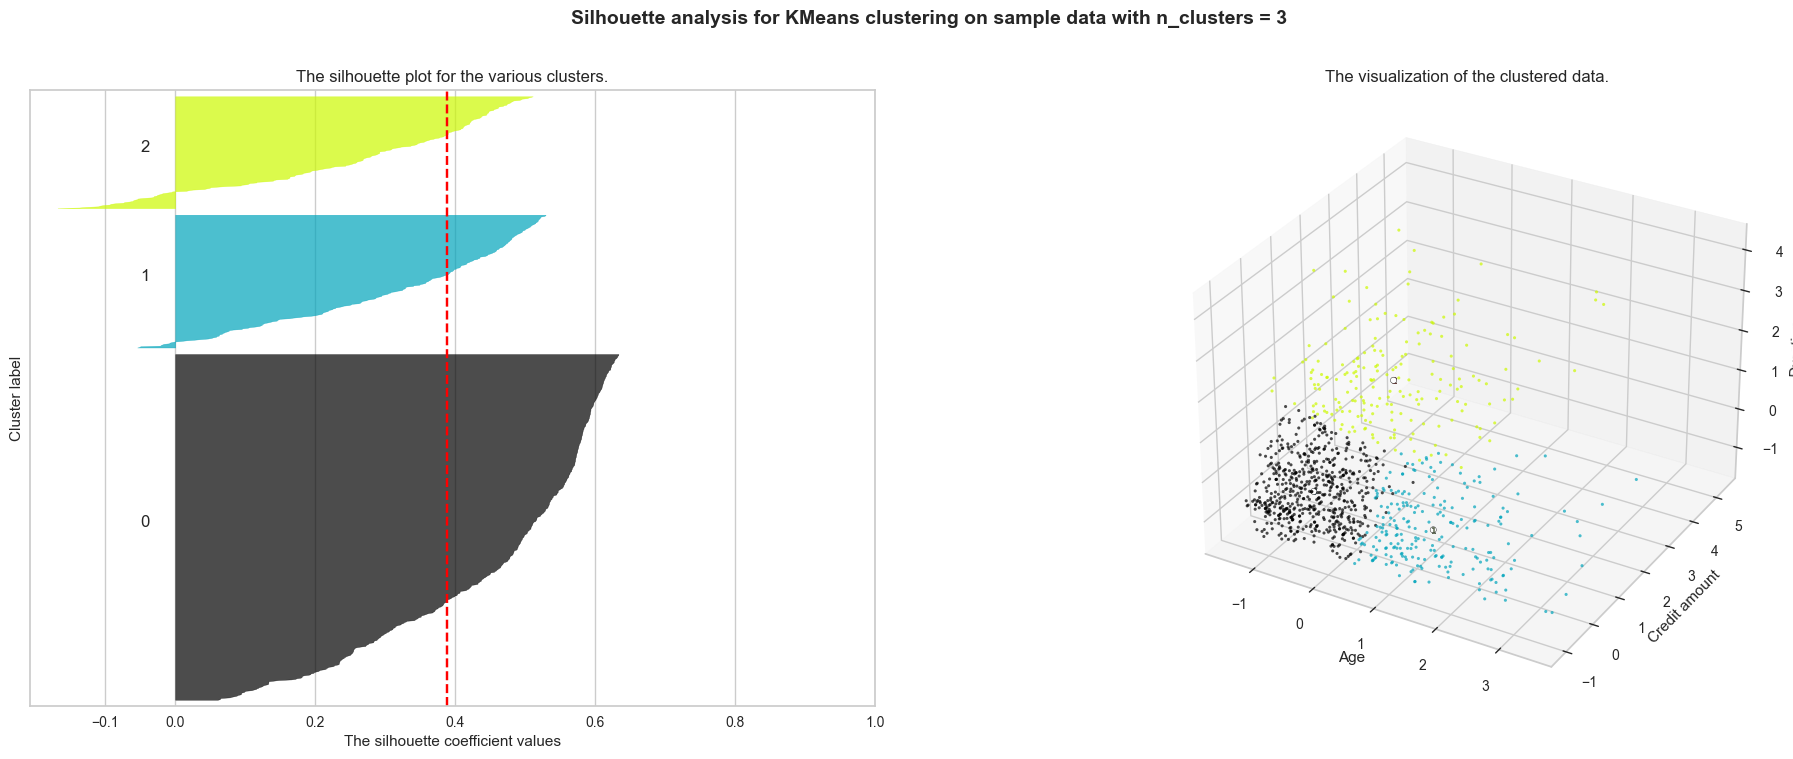

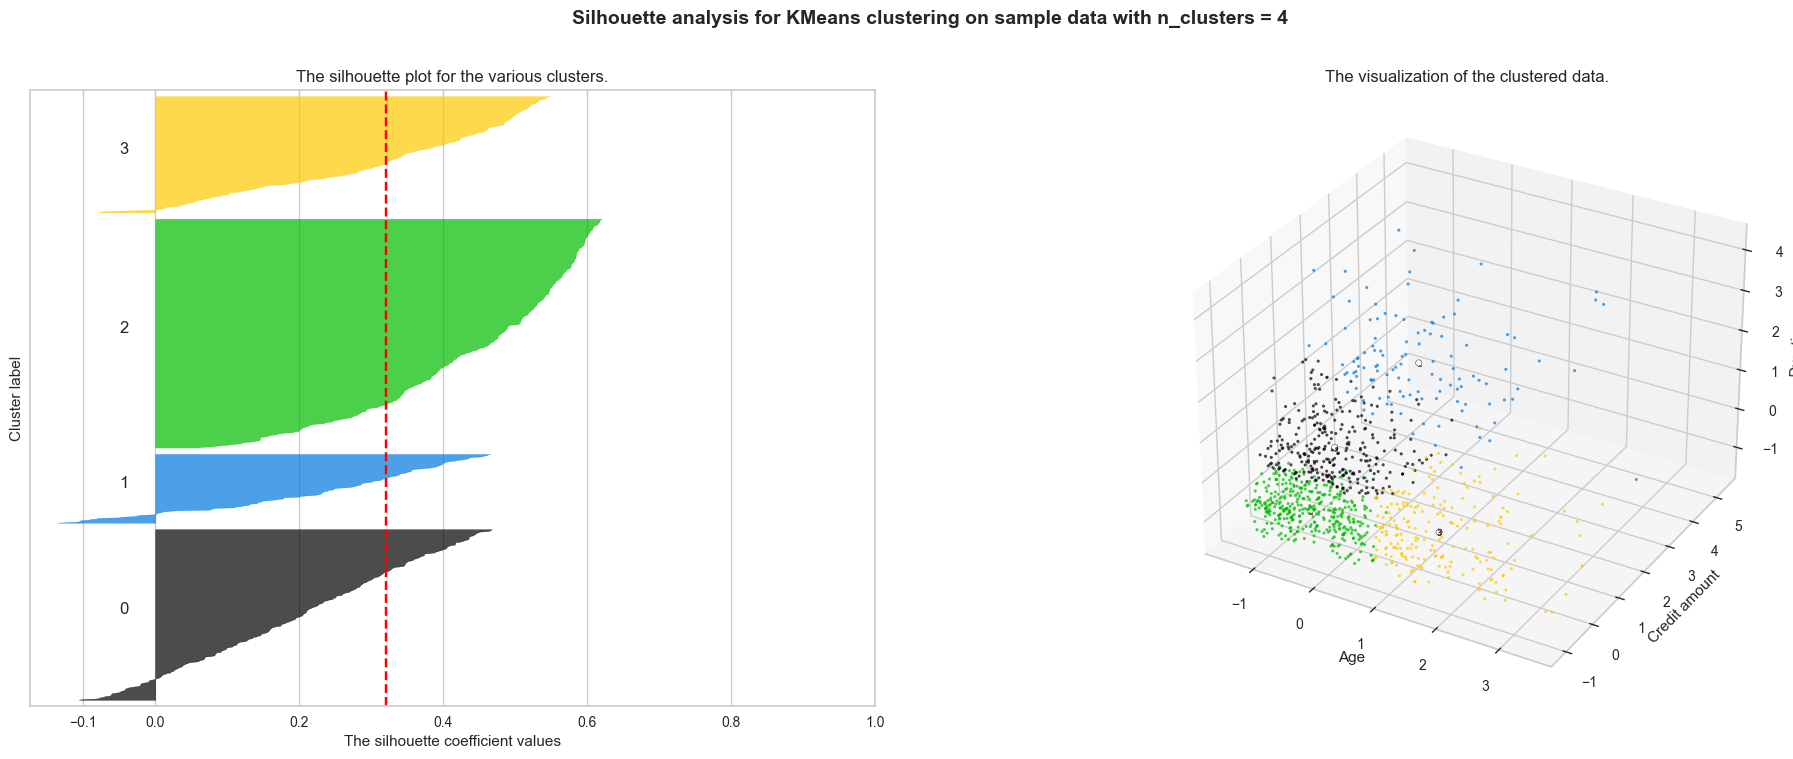

In [25]:
# Choosing range for clusters

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig = plt.figure(figsize=(24,8))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    # The (n_clusters+1)*10 is for inserting blank space between silhouetteplots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(number_data_scaled) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, n_init=100, max_iter=400,tol=0.0001, algorithm = "elkan", random_state=0)
    cluster_labels = clusterer.fit_predict(number_data_scaled)

    silhouette_avg = silhouette_score(number_data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(number_data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(number_data_scaled[:, 0], number_data_scaled[:, 1], number_data_scaled[:,2], marker='.', lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], centers[:,2], marker='o',
                c="white", alpha=1, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                     edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(number_columns[0])
    ax2.set_ylabel(number_columns[1])
    ax2.set_zlabel(number_columns[2])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Even though the best cluster by seeing the `Silhouette Score and Analysis` is `2 clusters`, I choose `3 Clusters` to have a more diverse segmentation.

# 7. Model Training

In [26]:
# Training using KMeans

kmean = KMeans(n_clusters=3, random_state=25)

In [27]:
# Train the Model

kmean.fit(number_data_scaled)

KMeans(n_clusters=3, random_state=25)

In [28]:
print('Silhoutte score of our model is ' + str(silhouette_score(number_data_scaled, kmean.labels_)))

Silhoutte score of our model is 0.3885096054051628


# 8. Model Evaluation

In [29]:
# Cluster using KMeans

predictions = kmean.predict(number_data_scaled)
data_train_test["Clusters"] = predictions

In [30]:
data_train_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Clusters
0,67,male,skilled,own,NaN,little,14494431,6,radio/TV,2
1,22,female,skilled,own,little,moderate,73786449,48,radio/TV,0
2,49,male,unskilled and resident,own,little,NaN,25988304,12,education,2
3,45,male,skilled,free,little,little,97728918,42,furniture/equipment,0
4,53,male,skilled,free,little,little,60383130,24,car,2
...,...,...,...,...,...,...,...,...,...,...
985,31,female,unskilled and resident,own,little,NaN,21524664,12,furniture/equipment,1
986,40,male,highly skilled,own,little,little,47822943,30,car,1
987,38,male,skilled,own,little,NaN,9968796,12,radio/TV,1
988,23,male,skilled,free,little,little,22876155,45,radio/TV,0


# 9. Model Saving

# 10. Model Inference

In [31]:
# Display Inference-Set 

data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35,male,skilled,own,moderate,NaN,34134447,9,radio/TV
1,28,female,skilled,own,moderate,NaN,25703127,12,radio/TV
2,49,female,skilled,own,little,moderate,13539708,12,radio/TV
3,24,male,skilled,own,little,NaN,22318200,18,radio/TV
4,25,female,skilled,rent,NaN,little,16999029,24,car
5,33,male,skilled,own,rich,NaN,19131657,6,furniture/equipment
6,29,male,highly skilled,rent,moderate,NaN,23570499,24,radio/TV
7,32,male,skilled,free,little,NaN,47897337,24,business
8,29,male,highly skilled,free,little,little,81573021,24,car
9,29,male,skilled,own,moderate,moderate,17817363,9,car


In [32]:
# Using Age, Credit amount, and Duration column to cluster

number_columns = ["Age", "Credit amount", "Duration"]
number_data_inf = data_inf.loc[:,number_columns]

In [33]:
# Feature Scaling

data_inf_2 = scaler.transform(number_data_inf)
data_inf_2

array([[-0.05166108, -0.18610158, -0.98897413],
       [-0.66574562, -0.4263957 , -0.7407066 ],
       [ 1.176508  , -0.7730553 , -0.7407066 ],
       [-1.01665108, -0.52286672, -0.24417154],
       [-0.92892471, -0.67446404,  0.25236353],
       [-0.22711381, -0.61368376, -1.23724167],
       [-0.57801926, -0.48717598,  0.25236353],
       [-0.31484017,  0.20614323,  0.25236353],
       [-0.57801926,  1.1659062 ,  0.25236353],
       [-0.57801926, -0.65114138, -0.98897413]])

In [34]:
# Cluster using KMeans

predictions_inf = kmean.predict(data_inf_2)
data_inf["Clusters"] = predictions_inf

In [35]:
data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Clusters
0,35,male,skilled,own,moderate,NaN,34134447,9,radio/TV,1
1,28,female,skilled,own,moderate,NaN,25703127,12,radio/TV,1
2,49,female,skilled,own,little,moderate,13539708,12,radio/TV,2
3,24,male,skilled,own,little,NaN,22318200,18,radio/TV,1
4,25,female,skilled,rent,NaN,little,16999029,24,car,1
5,33,male,skilled,own,rich,NaN,19131657,6,furniture/equipment,1
6,29,male,highly skilled,rent,moderate,NaN,23570499,24,radio/TV,1
7,32,male,skilled,free,little,NaN,47897337,24,business,1
8,29,male,highly skilled,free,little,little,81573021,24,car,0
9,29,male,skilled,own,moderate,moderate,17817363,9,car,1


# 11. Kesimpulan